In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### loading data to dataframes for first impression 

In [2]:
filename = "DJIA_table_train.csv" 
mydir="/home/edith/Documents/DSR/mincomp2/minicomp-news-stock-prices/data/train/"
DJ_df = pd.read_csv(mydir+filename, parse_dates=True)

In [3]:
DJ_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,label
0,2008-08-08,11432.089844,NaN,11388.040039,11734.320312,212830000.0,11734.320312,0.0
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,NaN,11782.349609,0.0
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,1.0
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,1.0
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,NaN


### exploring DJ_df 

In [4]:
DJ_df.shape

(1584, 8)

In [5]:
DJ_df.describe()

,Open,High,Low,Close,Volume,Adj Close,label
count,1510.000000,1505.000000,1519.000000,1513.000000,1.492000e+03,1523.000000,1503.000000
mean,12450.126443,12502.871161,12371.717136,12473.419958,1.756904e+08,12441.764919,0.458417
std,2667.713901,2646.087473,2678.915034,2663.267290,9.816605e+07,2666.134470,0.498434
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805,0.000000
25%,10450.169678,10493.570312,10388.409668,10452.000000,1.092525e+08,10443.274902,0.000000
50%,12310.194824,12331.309570,12224.450195,12341.830078,1.506900e+08,12263.580078,0.000000
75%,14802.067627,14839.799805,14715.989746,14818.750000,2.099925e+08,14776.330078,1.000000
max,17685.509766,17735.710938,17642.029297,17719.000000,6.749200e+08,17719.000000,1.000000


/home/edith/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/edith/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


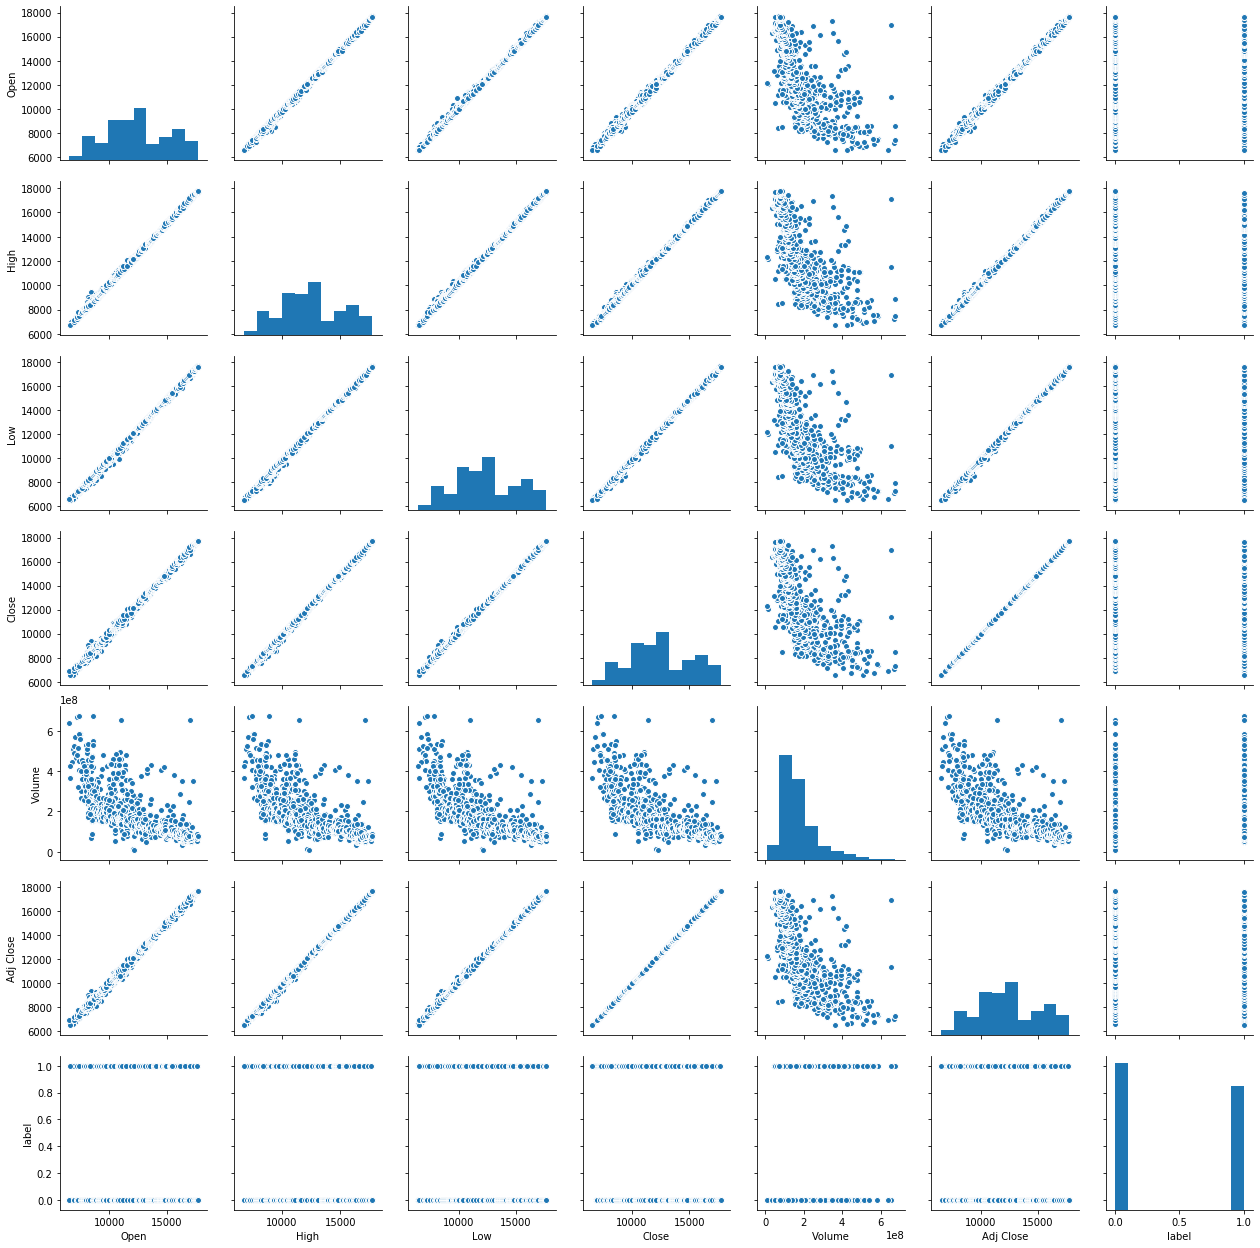

In [6]:
sns.pairplot(DJ_df)

In [7]:
DJ_df.any()

Date         True
Open         True
High         True
Low          True
Close        True
Volume       True
Adj Close    True
label        True
dtype: bool

### missing values: some values are highly correlated so we can use this correlation to fill empty values

In [8]:
# function for calculating linear regression and using it to fill values
def Fix_Empty(df1, df2):
    f1_index = df1.index[df1.apply(np.isfinite)].to_list()
    f2_index = df2.index[df2.apply(np.isfinite)].to_list()

    idx=list(set(f1_index) & set(f2_index))
    # since linearly correlated I can fill values easy using linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(df1[idx], df2[idx])
    f2_index = df2.index[df2.apply(np.isnan)].to_list()

    df2[f2_index] = intercept + slope * df1[f2_index]
    
    return


### open and Adj_close

In [9]:
Fix_Empty(DJ_df.Open,DJ_df["Adj Close"])

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
Fix_Empty(DJ_df["Adj Close"],DJ_df.Open)

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### open and High

In [11]:
Fix_Empty(DJ_df.Open,DJ_df.High)
Fix_Empty(DJ_df.High,DJ_df.Open)

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Open and Low

In [12]:
Fix_Empty(DJ_df.Open,DJ_df.Low)
Fix_Empty(DJ_df.Low,DJ_df.Open)

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Open and Cose

In [13]:
Fix_Empty(DJ_df.Open,DJ_df.Close)
Fix_Empty(DJ_df.Close,DJ_df.Open)

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Close and Low

In [14]:
Fix_Empty(DJ_df.Low,DJ_df.Close)
Fix_Empty(DJ_df.Close,DJ_df.Low)

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Close and High

In [15]:
Fix_Empty(DJ_df.High,DJ_df.Close)
Fix_Empty(DJ_df.Close,DJ_df.High)

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Close and Adj_close

In [16]:
Fix_Empty(DJ_df.Close,DJ_df["Adj Close"])
Fix_Empty(DJ_df["Adj Close"],DJ_df.Close)

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Low and Adj_close

In [17]:
Fix_Empty(DJ_df.Low,DJ_df["Adj Close"])
Fix_Empty(DJ_df["Adj Close"],DJ_df.Low)

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Low and High

In [18]:
Fix_Empty(DJ_df.Low,DJ_df.High)
Fix_Empty(DJ_df.High,DJ_df.Low)

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### See if I can fill Volume values.

#### First check if it depends on day of week

In [19]:
DJ_df["Date"]=pd.to_datetime(DJ_df.Date)

In [20]:
DJ_df["Day"]= DJ_df.Date.dt.dayofweek

In [21]:
By_day_mean=DJ_df.groupby(by="Day").mean()
By_day_std=DJ_df.groupby(by="Day").std()
By_day_mean

,Open,High,Low,Close,Volume,Adj Close,label
Day,,,,,,,
0,12437.833163,12513.411430,12355.820393,12436.518560,1.625482e+08,12435.284502,0.517483
1,12417.354156,12501.035144,12344.936150,12428.304926,1.684834e+08,12429.021946,0.442308
2,12407.497585,12481.622062,12324.510406,12403.565340,1.701497e+08,12403.157605,0.470395
3,12458.057306,12542.140498,12368.747139,12464.906597,1.736726e+08,12462.917793,0.460265
4,12430.778254,12501.831344,12347.487754,12436.844788,2.035819e+08,12438.575091,0.404682


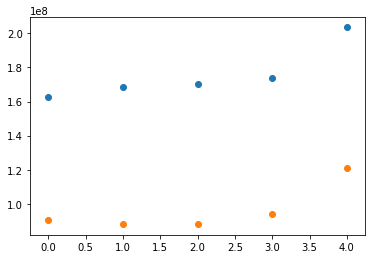

In [22]:
plt.scatter(np.arange(5),By_day_mean.Volume)
plt.scatter(np.arange(5),By_day_std.Volume)

##### Check if depends on Day of Month

In [23]:
DJ_df["DayOfMonth"]= DJ_df.Date.dt.day

In [24]:
By_day_mean=DJ_df.groupby(by="DayOfMonth").mean()
By_day_std=DJ_df.groupby(by="DayOfMonth").std()

In [25]:
By_day_mean

,Open,High,Low,Close,Volume,Adj Close,label,Day
DayOfMonth,,,,,,,,
1,12299.897858,12392.860083,12207.210529,12288.227352,1.636680e+08,12291.551134,0.380952,1.978723
2,12249.992022,12327.070192,12169.269356,12251.738461,1.678667e+08,12251.302734,0.520833,2.000000
3,12513.834011,12600.157549,12442.432692,12537.553494,1.638906e+08,12534.035257,0.431373,2.000000
4,12391.974726,12468.688695,12292.533926,12386.423827,1.727244e+08,12379.506034,0.437500,2.020000
5,12464.966657,12525.249937,12367.286195,12469.039871,1.705065e+08,12469.191249,0.458333,2.137255
6,12468.543134,12546.467830,12361.850956,12474.036307,1.865053e+08,12473.678775,0.400000,2.019608
7,12635.465855,12708.972757,12543.852434,12619.656879,1.658362e+08,12619.720440,0.540000,2.019231
8,12348.748740,12421.348163,12266.906244,12359.946803,1.739656e+08,12362.101734,0.365385,1.981481
9,12247.493083,12322.349914,12163.216274,12239.009784,1.570834e+08,12237.154380,0.442308,1.962963


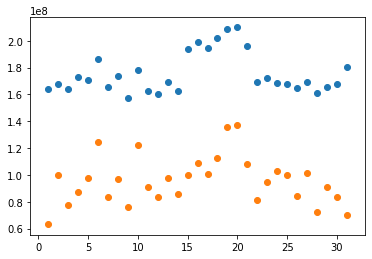

In [26]:
plt.scatter(np.arange(1,32),By_day_mean.Volume)
plt.scatter(np.arange(1,32),By_day_std.Volume)

### check if Volume depends on Volume the day before

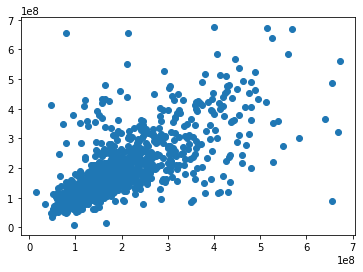

In [27]:
laggedVol= DJ_df.Volume.shift(-1)
plt.scatter(laggedVol, DJ_df.Volume)

In [28]:
laggedVol[0]

nan

In [29]:
DJ_df["Lag_Vol"]=DJ_df.Volume.shift(-1)

In [30]:
DJ_df.Lag_Vol.loc[0]=DJ_df.Lag_Vol.loc[1]

/home/edith/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
DJ_df.to_csv(mydir+"Clead_DJ")

In [32]:
DJ_df = pd.read_csv(mydir+"Clead_DJ", parse_dates=True)

In [33]:
DJ_df.drop(columns="Unnamed: 0",inplace=True)
DJ_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,label,Day,DayOfMonth,Lag_Vol
0,2008-08-08,11432.089844,11515.575801,11388.040039,11734.320312,212830000.0,11734.320312,0.0,4,8,173590000.0
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,NaN,11782.349609,0.0,0,11,173590000.0
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,1.0,1,12,182550000.0
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,1.0,2,13,159790000.0
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,NaN,3,14,215040000.0


In [34]:
train_idx2 = DJ_df.index[DJ_df.Lag_Vol.apply(np.isnan)].to_list()
len(train_idx2)

92

In [35]:
a=DJ_df.Volume.shift(-2)
DJ_df.loc[train_idx2,'Lag_Vol']=a[train_idx2]

In [36]:
train_idx2 = DJ_df.index[DJ_df.Lag_Vol.apply(np.isnan)].to_list()
len(train_idx2)

6

In [37]:
a=DJ_df.Volume.shift(-3)
DJ_df.loc[train_idx2,'Lag_Vol']=a[train_idx2]

In [38]:
train_idx2 = DJ_df.index[DJ_df.Lag_Vol.apply(np.isnan)].to_list()
len(train_idx2)

1

In [39]:
a=DJ_df.Volume.shift(-4)
DJ_df.loc[train_idx2,'Lag_Vol']=a[train_idx2]
train_idx2 = DJ_df.index[DJ_df.Lag_Vol.apply(np.isnan)].to_list()
train_idx2

[1583]

In [40]:
DJ_df.Lag_Vol[1583]=DJ_df.Lag_Vol[1582]

/home/edith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
DJ_df.to_csv(mydir+"Clead_DJ")

In [42]:
DJ_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,label,Day,DayOfMonth,Lag_Vol
0,2008-08-08,11432.089844,11515.575801,11388.040039,11734.320312,212830000.0,11734.320312,0.0,4,8,173590000.0
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,NaN,11782.349609,0.0,0,11,173590000.0
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,1.0,1,12,182550000.0
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,1.0,2,13,159790000.0
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,NaN,3,14,215040000.0


In [43]:
DJ_df.Lag_Vol.isnull().any()

False

### Random Forest for estimating missing Volume Values

In [44]:
train_idx = DJ_df.index[DJ_df.Volume.apply(np.isfinite)].to_list()


test_idx = DJ_df.index[DJ_df.Volume.apply(np.isnan)].to_list()


In [45]:
X_train = DJ_df.loc[train_idx,:]
y_train = X_train.Volume
X_train.drop(columns = 'Volume', inplace=True) 
X_train.drop(columns=["Date","label"],inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [46]:
X_train.reset_index(drop=True)
X_test.reset_index(drop=True)

y_train.reset_index(drop=True)
y_test.reset_index(drop=True)

0       84350000.0
1      126810000.0
2       88010000.0
3      146950000.0
4      108800000.0
5      189670000.0
6      219330000.0
7      166920000.0
8      202810000.0
9      207100000.0
10      62360000.0
11     207060000.0
12     130680000.0
13      55500000.0
14     350470000.0
15     201890000.0
16     141230000.0
17     194470000.0
18      94920000.0
19     340740000.0
20     256500000.0
21     119610000.0
22     308820000.0
23     225620000.0
24     166140000.0
25     201410000.0
26      87810000.0
27     107830000.0
28      76850000.0
29     215420000.0
          ...     
463    138280000.0
464    142600000.0
465    268220000.0
466    169990000.0
467     52670000.0
468    154360000.0
469    124200000.0
470     68210000.0
471    135430000.0
472    321300000.0
473     89110000.0
474    149860000.0
475    188120000.0
476    200850000.0
477    105770000.0
478    378620000.0
479    143670000.0
480    169940000.0
481    308210000.0
482    140510000.0
483    111680000.0
484     7682

In [47]:
len(y_train)

999

In [48]:
X_val = DJ_df.loc[test_idx,:]
X_val.drop(columns=["Date","label"],inplace=True)
y_val = X_val.Volume
X_val.drop(columns = 'Volume', inplace=True) 

In [49]:
X_train.head()

,Open,High,Low,Close,Adj Close,Day,DayOfMonth,Lag_Vol
1313,15523.719727,15570.599609,15512.959961,15570.280273,15570.280273,4,25,92760000.0
1134,13992.969727,13992.969727,13940.410156,13971.240234,13971.240234,0,11,117180000.0
459,9931.750000,9982.379883,9810.299805,9816.490234,9816.490234,0,7,259680000.0
614,11732.129883,11794.150391,11698.830078,11787.379883,11787.379883,4,14,203390000.0
954,12505.379883,12575.959961,12447.330078,12502.809570,12502.809570,1,22,152190000.0


In [50]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=3, random_state=42, n_estimators=100,verbose=1)
regr.fit(X_train, y_train)  

/home/edith/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=1, warm_start=False)

In [51]:
yhat=regr.predict(X_train)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [52]:
from sklearn.metrics import r2_score
train_score=r2_score(y_train, yhat)
train_score

0.6974408054566376

In [53]:
yhat=regr.predict(X_test)
test_score=r2_score(y_test, yhat)
test_score

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.6413743316775062

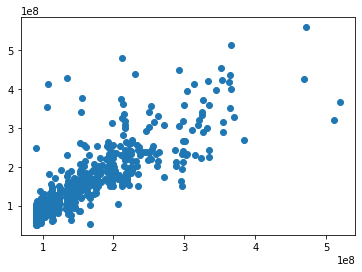

In [54]:
plt.scatter(yhat.T,y_test.T)

In [55]:
meanY=np.mean(y_train)
yy=np.full_like(y_test,meanY)

In [56]:
r2_score(y_test, yy)
  

-0.002139808628557338

### random forest gives a r2_score on test of 0.64 while a naive average gives r2_score of -0.002 so random forest it is!

In [57]:
yhat=regr.predict(X_val)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [58]:
DJ_df.loc[test_idx,"Volume"]=yhat

In [59]:
DJ_df.to_csv(mydir+"Clead_DJ")

In [60]:
DJ_df.isnull().any()

Date          False
Open          False
High          False
Low           False
Close         False
Volume        False
Adj Close     False
label          True
Day           False
DayOfMonth    False
Lag_Vol       False
dtype: bool

In [61]:
DJ_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,label,Day,DayOfMonth,Lag_Vol
0,2008-08-08,11432.089844,11515.575801,11388.040039,11734.320312,2.128300e+08,11734.320312,0.0,4,8,173590000.0
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,1.767956e+08,11782.349609,0.0,0,11,173590000.0
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,1.735900e+08,11642.469727,1.0,1,12,182550000.0
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,1.825500e+08,11532.959961,1.0,2,13,159790000.0
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,1.597900e+08,11615.929688,NaN,3,14,215040000.0


In [62]:
DJ_df.to_csv(mydir+"Clead_DJ")

In [72]:
a=DJ_df["Adj Close"]-DJ_df["Adj Close"].shift(-1)
a[a>=0]=1
a[a<0]=0
a[1583]=0

In [73]:
DJ_df.label=a

In [74]:
DJ_df.to_csv(mydir+"Clead_DJ")

### Dimentionality reduction using PCA 

In [78]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=2)
pca.fit(DJ_df.loc[:,["Open","High","Low","Close","Volume","Adj Close","Lag_Vol"]])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
print(pca.explained_variance_ratio_)  

[0.87403698 0.12596302]


In [86]:
 print(pca.singular_values_) 

[5.18088407e+09 1.96680134e+09]


In [88]:
b=pca.transform(DJ_df.loc[:,["Open","High","Low","Close","Volume","Adj Close","Lag_Vol"]])

In [89]:
b.shape

(1584, 2)

In [92]:
DJ_df["1st_PC"]=b[:,0]
DJ_df["2nd_PC"]=b[:,1]

In [93]:
DJ_df.to_csv(mydir+"Clead_DJ")

In [96]:
DJ_df.head()

,Date,label,Day,DayOfMonth,1st_PC,2nd_PC
0,2008-08-08,0.0,4,8,2.386747e+07,2.812395e+07
1,2008-08-11,1.0,0,11,-1.289218e+06,2.324329e+06
2,2008-08-12,1.0,1,12,2.887976e+06,-6.226016e+06
3,2008-08-13,0.0,2,13,-7.152297e+06,1.607851e+07
4,2008-08-14,0.0,3,14,1.651571e+07,-3.878865e+07


In [95]:
DJ_df.drop(columns=["Open","High","Low","Close","Volume","Adj Close","Lag_Vol"],inplace=True)

In [97]:
DJ_df.to_csv(mydir+"number_data")